<a href="https://colab.research.google.com/github/msemina/ML_Fast_Start/blob/master/homework_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [ ]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [ ]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [ ]:
male_count = data[data.Sex=='male'].Sex.value_counts()[0]
female_count = data[data.Sex=='female'].Sex.value_counts()[0]

In [ ]:
#Опишите датасет. Сколько в нём мужчин, сколько женщин? 
print('Male count =', male_count)
print('Female count =', female_count)

Male count = 577
Female count = 314


In [ ]:
#Посчитайте распределение по классам пассажиров
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

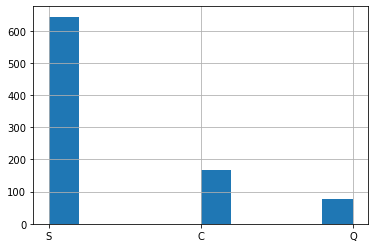

In [ ]:
data.Embarked.hist()

In [ ]:
#Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин
male_score = data.query("Sex == 'male' and Survived==1").Survived.count() \
              / data.query("Sex == 'male'").Survived.count()
female_score = data.query("Sex == 'female' and Survived==1").Survived.count() \
              / data.query("Sex == 'female'").Survived.count()

print('Male score =', male_score)
print('Female score = ', female_score)

Male score = 0.18890814558058924
Female score =  0.7420382165605095


Делаем вывод, что доля выживших женщин существенно больше, чем мужчин
Возможно, есть связь выживаемости с полом

### Аналитика по возрасту выжившего

Text(0.5, 1.0, 'Histogram of Age Survived')

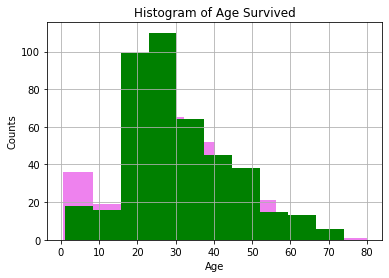

In [ ]:

data[data.Survived==1].Age.hist(color='violet')
data[data.Survived==0].Age.hist(color='green')

plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age Survived')

Text(0.5, 1.0, 'Histogram of Age not Survived')

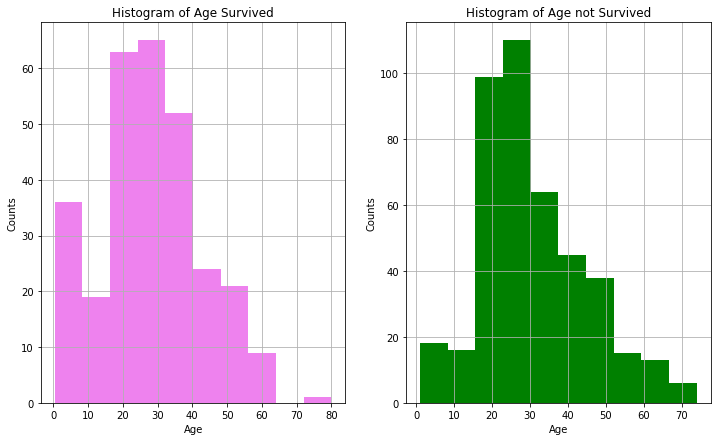

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
data[data.Survived==1].Age.hist(color='violet')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age Survived')

plt.subplot(1, 2, 2)
data[data.Survived==0].Age.hist(color='green')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age not Survived')

По графикам видно, что больше всего как выживших, так не выживших среди молодых людей (20-30 лет)
Среди выживших намного больше людей младше 10 лет, чем среди не выживших
Среди не выживших больше доля среди пожилых людей (55+)

### Аналитика по классу выжившего

<AxesSubplot:title={'center':'Histogram of Embarked Survived'}, xlabel='Embarked', ylabel='Counts'>

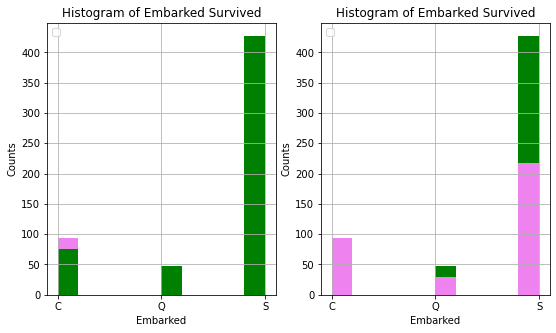

In [ ]:
plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.title('Histogram of Embarked Survived')
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.legend(['Survived', 'Not survived'])
data.query("Survived==1").sort_values('Embarked').Embarked.hist(color='violet')
data.query("Survived==0").sort_values('Embarked').Embarked.hist(color='green')

plt.subplot(1, 2, 2)
plt.title('Histogram of Embarked Survived')
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.legend(['Not Survived', 'Survived'])
data.query("Survived==0").sort_values('Embarked').Embarked.hist(color='green')
data.query("Survived==1").sort_values('Embarked').Embarked.hist(color='violet')


Из графиков видно, что количество не выживших среди класса S существенно выше, чем в других классах

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [ ]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [ ]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3)

In [ ]:
#проверка, правильно ли поделилось
data.shape

(891, 11)

In [ ]:
data_train.shape

(623, 11)

In [ ]:
data_test.shape

(268, 11)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [ ]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [ ]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data_train['cabin_type'] = data.apply(get_cabin_letter, axis=1)

c:\users\lecha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Новый признак: male < 18 лет

Посмотрим, имеет ли смысл отделить мальчиков от мужчин

Text(0.5, 1.0, 'Histogram of Age female not Survived')

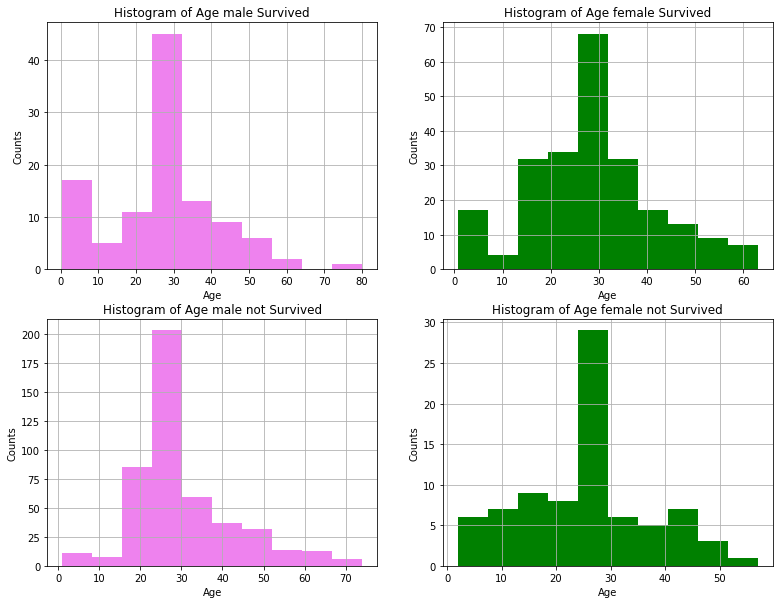

In [ ]:
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
data.query("Sex == 'male' and Survived==1").Age.hist(color='violet')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age male Survived')

plt.subplot(2, 2, 2)
data.query("Sex == 'female' and Survived==1").Age.hist(color='green')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age female Survived')

plt.subplot(2, 2, 3)
data.query("Sex == 'male' and Survived==0").Age.hist(color='violet')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age male not Survived')

plt.subplot(2, 2, 4)
data.query("Sex == 'female' and Survived==0").Age.hist(color='green')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age female not Survived')

Действительно, ~до 18 лет статистика по выживаемости среди мужчин меняется
Значит, добавим новый признак

In [ ]:
def get_boy(row): #rename this function appropriately
    return int(row.Sex =='male' and row.Age<18)

data_full['boy'] = data.apply(get_boy, axis=1)

In [ ]:
data_full.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,boy
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [ ]:
dummy_sex = pd.get_dummies(data["Sex"])
dummy_embarked = pd.get_dummies(data["Embarked"])

new_data = pd.concat([data,dummy_sex,dummy_embarked], axis=1)

In [ ]:
new_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male,0,C,Q,S
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1,0,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,1,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,1,0,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0,0,0,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,1,0,0,0,1


## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

Попробуем использовать метод K-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [ ]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
X = new_data[['Age','Fare','female','male','C','Q','S']]
Y = new_data.Survived

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

Train roc-auc: 0.8812080826378555
Test roc-auc: 0.7292575096899225


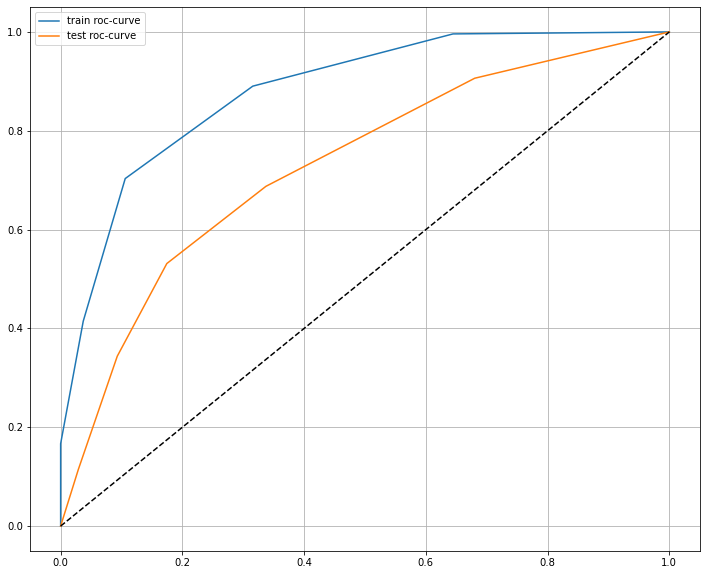

In [ ]:
plot_roc_curve(clf, X_train, X_test, y_train, y_test)

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [ ]:
new_train_data = new_data
new_train_data['cabin_type'] = new_data.apply(get_cabin_letter, axis=1)
new_train_data['boy'] = new_data.apply(get_boy, axis=1)

In [ ]:
new_train_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male,0,C,Q,S,cabin_type,boy
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1,0,0,0,1,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,1,0,0,C,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,1,0,0,0,0,1,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0,0,0,1,C,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,1,0,0,0,1,0,0


In [ ]:
X = new_data[['Age','Fare','female','male','C','Q','S','cabin_type','boy']]
Y = new_data.Survived

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [ ]:
# Не получилось 2 признака добавить, пытается преобразовать string во float...?
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'C'

In [ ]:
X = new_data[['Age','Fare','female','male','C','Q','S','boy']]
Y = new_data.Survived

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

Train roc-auc: 0.8795948410344298
Test roc-auc: 0.7261574074074074


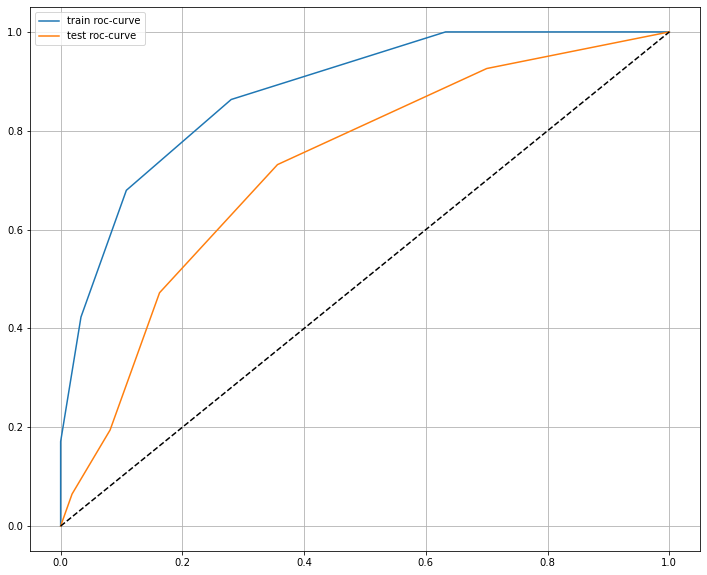

In [ ]:
plot_roc_curve(clf, X_train, X_test, y_train, y_test)

Добавление ещё одного признака не помогло улучшить результат, только ухудшило

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def search(X, y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

### KNeighborsClassifier

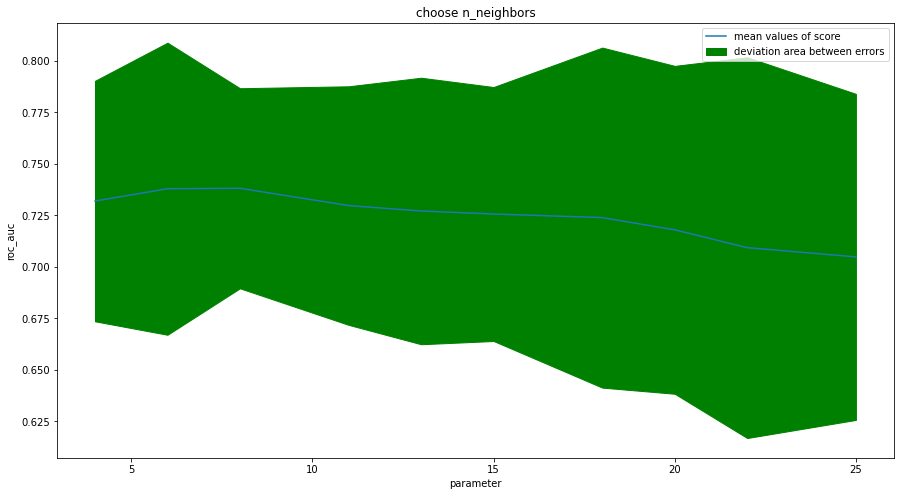

In [ ]:
models = [KNeighborsClassifier(n_jobs=-1)]
param_names = ['n_neighbors']
grids = [np.array(np.linspace(4, 25, 10), dtype='int')]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

### DecisionTreeClassifier

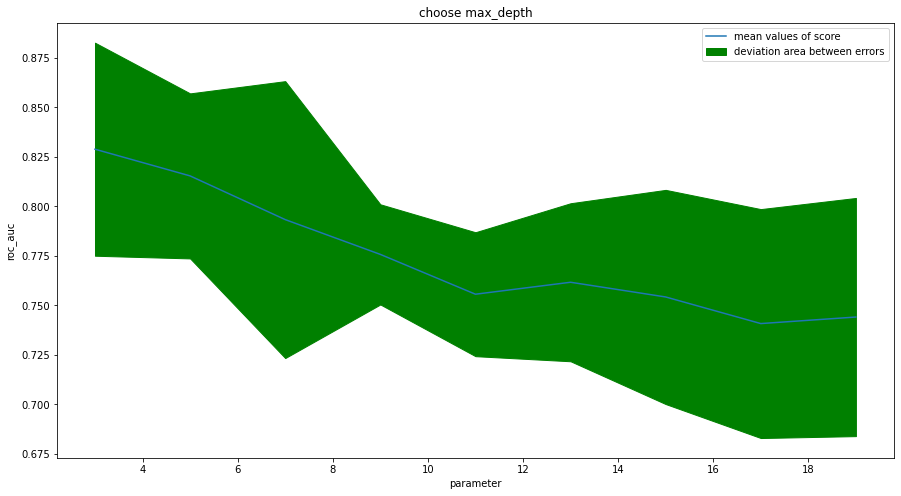

In [ ]:
models = [DecisionTreeClassifier()]
param_names = ['max_depth']
grids = [np.arange(3, 21, 2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale) 

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = [RandomForestClassifier(n_jobs=-1)]
param_names = ['n_estimators']
grids = [[10, 20, 30, 50, 75, 100, 150]]
param_scales = ['ordinary']

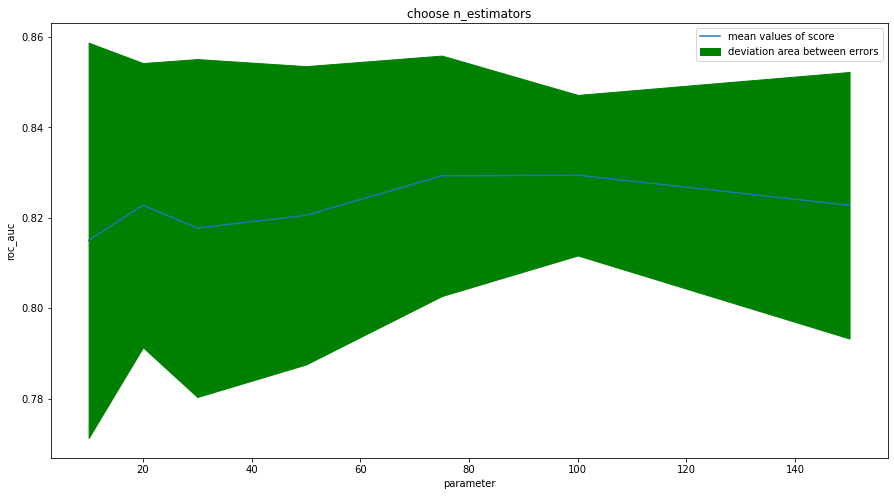

In [ ]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

Видно, что решающее дерево в данном случае использовать лучше

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

Train roc-auc: 0.9986652165315404
Test roc-auc: 0.8305555555555555


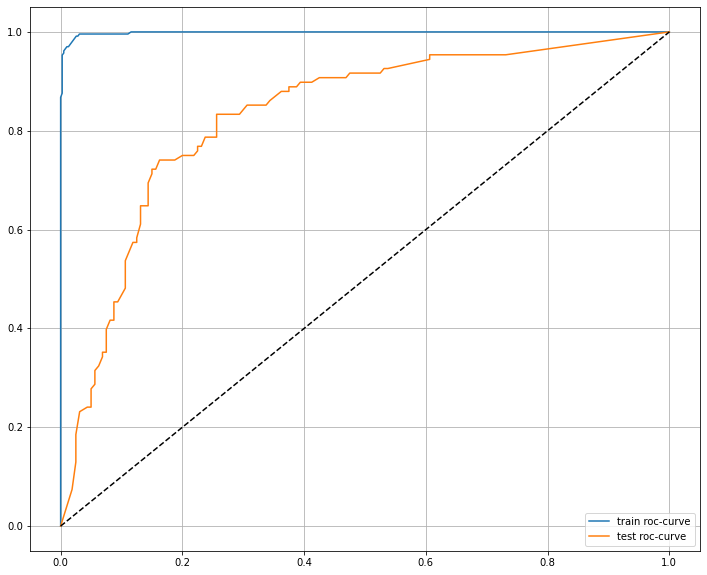

In [ ]:
model = RandomForestClassifier(n_estimators=75, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

In [ ]:
y_test = clf.predict(X_test)

Train roc-auc: 0.9989508492079187
Test roc-auc: 0.796151492486571


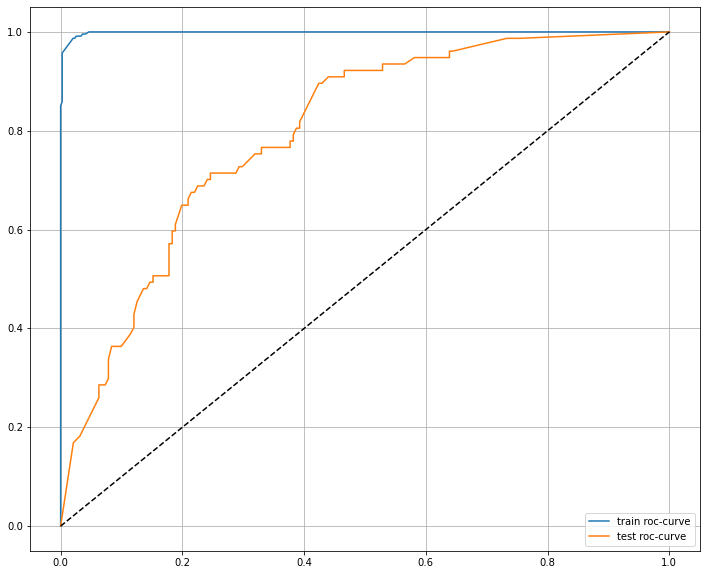

In [ ]:
plot_roc_curve(model, X_train, X_test, y_train, y_test)

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

Идея добавить новый признак, отделяющий мальчиков от мужчин, не улучшила результат.
Самый худший результат показал метод K ближайших соседей. Также при подборе оптимального гиперпараметра разброс дисперсий был довольно значительным.

На решающем дереве результат получился лучше, но больше всего скор получился с помощью случайного леса